https://stackoverflow.com/questions/77488835/gradient-descent-stuck-in-local-minima

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [12]:
def system(x):
    return np.array([
        x[0]*x[0] + 2*x[1]*x[1] + np.sin(2*x[0]),
        x[0]*x[0] + np.cos(x[0] + 5*x[1]) - 1.2
    ])
 

In [13]:
xlin = np.linspace(-2, 2, 200)
ylin = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(xlin, ylin)
Z = system([X, Y])

In [14]:
solutions = np.array([
    optimize.fsolve(system, x0=[0, 0]),
    optimize.fsolve(system, x0=[-1, 0]),
    optimize.fsolve(system, x0=[-1, 0.5])
])

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [15]:
solutions

array([[ 0.        ,  0.        ],
       [-0.96352546, -0.06643926],
       [-0.84056293,  0.37906057]])

In [16]:
system(solutions.T).T

array([[ 0.00000000e+00, -2.00000000e-01],
       [ 8.88178420e-16,  6.66133815e-16],
       [-2.22044605e-15, -4.88498131e-15]])

In [28]:
def f1(x, y):
    return y - np.sqrt((-np.sin(2*x) - x**2)/2)

def f2(x, y):
    return y + np.sqrt((-np.sin(2*x) - x**2)/2)

def f3(x, y):
    return y - (np.arccos(1.2 - x**2) - x)/5

/tmp/ipykernel_819/2523583590.py:2: RuntimeWarning: invalid value encountered in sqrt
  return y - np.sqrt((-np.sin(2*x) - x**2)/2)
/tmp/ipykernel_819/2523583590.py:5: RuntimeWarning: invalid value encountered in sqrt
  return y + np.sqrt((-np.sin(2*x) - x**2)/2)
/tmp/ipykernel_819/2523583590.py:8: RuntimeWarning: invalid value encountered in arccos
  return y - (np.arccos(1.2 - x**2) - x)/5


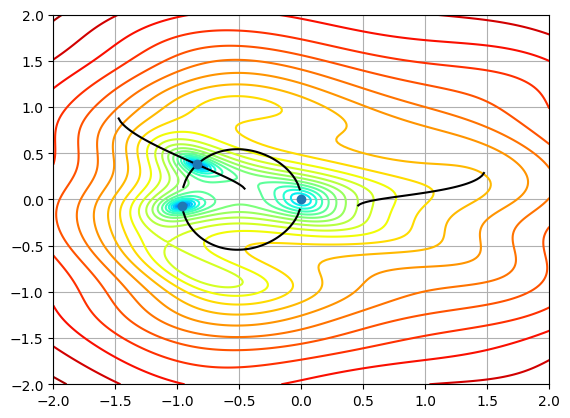

In [29]:
fig, axe = plt.subplots()
axe.contour(X, Y, np.log10(np.sqrt(Z[0]**2 + Z[1]**2)), 30, cmap="jet")
axe.contour(X, Y, f1(X, Y), 0, colors="black")
axe.contour(X, Y, f2(X, Y), 0, colors="black")
axe.contour(X, Y, f3(X, Y), 0, colors="black")
axe.plot(*solutions.T, linestyle="none", marker="o")
axe.grid()

In [20]:
optimize.fsolve(system, x0=[0, 0], full_output=True)

(array([0., 0.]),
 {'nfev': 15,
  'fjac': array([[-1.00000000e+00, -2.54340978e-08],
         [ 2.54340978e-08, -1.00000000e+00]]),
  'r': array([-3.12495738e+12,  2.10079410e+06, -5.44853621e-02]),
  'qtf': array([5.08681955e-09, 2.00000000e-01]),
  'fvec': array([ 0. , -0.2])},
 5,
 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.')